In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Data

df = pd.read_csv("DIS.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-12,119.000000,121.610001,118.919998,121.570000,121.570000,21964800
1,2022-08-15,121.000000,125.959999,120.989998,124.260002,124.260002,24628300
2,2022-08-16,124.730003,126.480003,123.449997,124.959999,124.959999,14607300
3,2022-08-17,123.449997,124.480003,122.570000,122.809998,122.809998,9140900
4,2022-08-18,123.010002,123.129997,121.709999,122.669998,122.669998,7343900


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-12,119.000000,121.610001,118.919998,121.570000,121.570000,21964800
1,2022-08-15,121.000000,125.959999,120.989998,124.260002,124.260002,24628300
2,2022-08-16,124.730003,126.480003,123.449997,124.959999,124.959999,14607300
3,2022-08-17,123.449997,124.480003,122.570000,122.809998,122.809998,9140900
4,2022-08-18,123.010002,123.129997,121.709999,122.669998,122.669998,7343900


In [5]:

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Data Processing
# Feature Scaling

scalar = MinMaxScaler()
df[['Open','High','Low','Close']] = scalar.fit_transform(df[['Open','High','Low','Close']])
df['Volume'] = scalar.fit_transform(df['Volume'].values.reshape(-1,1))

In [8]:
df['Volume']

0      0.255040
1      0.296114
2      0.141582
3      0.057285
4      0.029574
         ...   
246    0.083154
247    0.174900
248    0.417778
249    0.790945
250    0.254437
Name: Volume, Length: 251, dtype: float64

In [9]:
df['Volume'].max()

0.9999999999999998

In [10]:
df['High']

0      0.878886
1      0.987068
2      1.000000
3      0.950261
4      0.916687
         ...   
246    0.023875
247    0.051231
248    0.081820
249    0.155683
250    0.126337
Name: High, Length: 251, dtype: float64

In [11]:
# Feature Selection

X = df[['Open','High','Low','Close']]
y = df['Volume']

In [12]:
X

,Open,High,Low,Close
0,0.854863,0.878886,0.884967,0.916891
1,0.905522,0.987068,0.937532,0.982839
2,1.000000,1.000000,1.000000,1.000000
3,0.967578,0.950261,0.977654,0.947291
4,0.956434,0.916687,0.955815,0.943859
...,...,...,...,...
246,0.035714,0.023875,0.048756,0.065212
247,0.031662,0.051231,0.051549,0.097083
248,0.100051,0.081820,0.075419,0.081392
249,0.119554,0.155683,0.093448,0.186075


In [13]:
y

0      0.255040
1      0.296114
2      0.141582
3      0.057285
4      0.029574
         ...   
246    0.083154
247    0.174900
248    0.417778
249    0.790945
250    0.254437
Name: Volume, Length: 251, dtype: float64

In [14]:
# Splitting the data into training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.count()

Open     200
High     200
Low      200
Close    200
dtype: int64

In [16]:
X_test.count()

Open     51
High     51
Low      51
Close    51
dtype: int64

In [17]:
y_train.count()

200

In [18]:
y_test.count()

51

In [19]:
# Reshape data to be 3D for LSTM model

from keras.layers import  LSTM

X_train = np.reshape(X_train.values,(X_train.shape[0],X_train.shape[1],1))

X_test = np.reshape(X_test.values,(X_test.shape[0],X_test.shape[1],1))
X_train

array([[[0.34143875],
        [0.31459834],
        [0.34535295],
        [0.34150526]],

       [[0.08080045],
        [0.07261887],
        [0.10284417],
        [0.10590831]],

       [[0.18769006],
        [0.20940074],
        [0.18410362],
        [0.23902917]],

       [[0.3530902 ],
        [0.33225561],
        [0.3562722 ],
        [0.35229229]],

       [[0.27228975],
        [0.27132558],
        [0.24454032],
        [0.27800941]],

       [[0.09245192],
        [0.08430755],
        [0.11223967],
        [0.11988232]],

       [[0.44731516],
        [0.41556835],
        [0.45759262],
        [0.44152982]],

       [[0.12765959],
        [0.11216119],
        [0.14398168],
        [0.13679828]],

       [[0.14817623],
        [0.15518538],
        [0.17648546],
        [0.19588149]],

       [[0.        ],
        [0.04899281],
        [0.02285427],
        [0.07379264]],

       [[0.07598784],
        [0.05993541],
        [0.09624178],
        [0.09634714]],

       [[0

In [20]:
# Define LSTM model architecture

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [21]:
# Compile the model

from sklearn.metrics import mean_squared_error

model.compile(loss='mean_squared_error',optimizer = 'adam')

In [22]:
# Train the model

Train_Model = model.fit(X_train,y_train,epochs=60,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
7/7 [==============================] - 4s 106ms/step - loss: 0.0261 - val_loss: 0.0119
Epoch 2/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.0139
Epoch 3/60
7/7 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0107
Epoch 4/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.0104
Epoch 5/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0101
Epoch 6/60
7/7 [==============================] - 0s 9ms/step - loss: 0.0171 - val_loss: 0.0102
Epoch 7/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0104
Epoch 8/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0104
Epoch 9/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.0109
Epoch 10/60
7/7 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0106
Epoch 11/60
7/7 [====================

In [23]:
# Evaluation of the model

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error is :",rmse)

2/2 [==============================] - 1s 5ms/step
Root_Mean_Squared_Error is : 0.0975754929040029


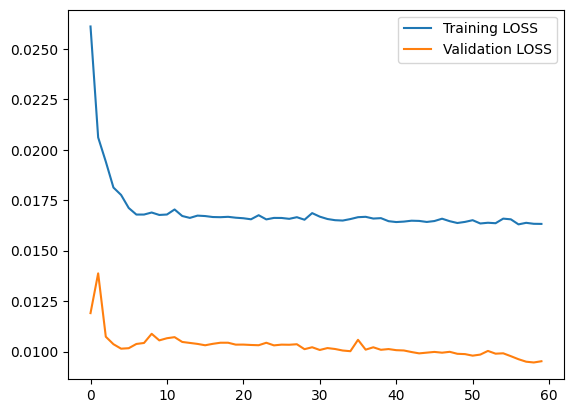

In [24]:
# Visualize training and validation loss


plt.plot(Train_Model.history['loss'],label='Training LOSS' )
plt.plot(Train_Model.history['val_loss'],label='Validation LOSS' )
plt.legend()
plt.show()

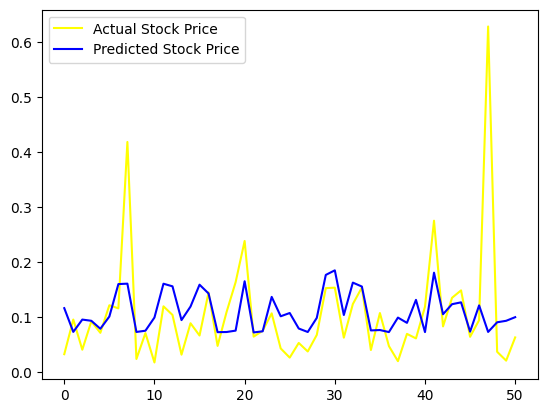

In [25]:
# Visualize actual vs predicted stock prices

plt.plot(y_test.values, color='yellow', label='Actual Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.legend()
plt.show()
